# Setup

In [ ]:
import datetime
import flopy as fp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
from pypalettes import load_cmap
import re
import seaborn as sns

import sys
sys.path.append('D://repos//custom_packages')
import dataviz as dv

# Read from GWV target files

## Path definition

In [71]:
model_cwd = 'D:/MAURICE/MAURICE Model/MAU_v2/MAU_v2_transient/MAU_v2_5_1'
model_name = 'M2v5_1'
date_start = datetime.datetime(2023,9,3)
if not os.path.exists(os.path.join(model_cwd, 'plot')):
    os.makedirs(os.path.join(model_cwd, 'plot'))

## Visualization

### Subplots

In [307]:
# Read
target_results = pd.read_csv(os.path.join(model_cwd, f'{model_name}_headtarget_resids.csv'))

# Obtain field "date"
dates = [date_start + datetime.timedelta(0, t) for t in target_results.Time]
target_results['Date'] = dates

# Sort from North to South
df_plot = target_results.sort_values('Y', ascending=False).copy()

print('Number of head target points: ', len(target_results.Name.unique()))

Number of head target points:  48


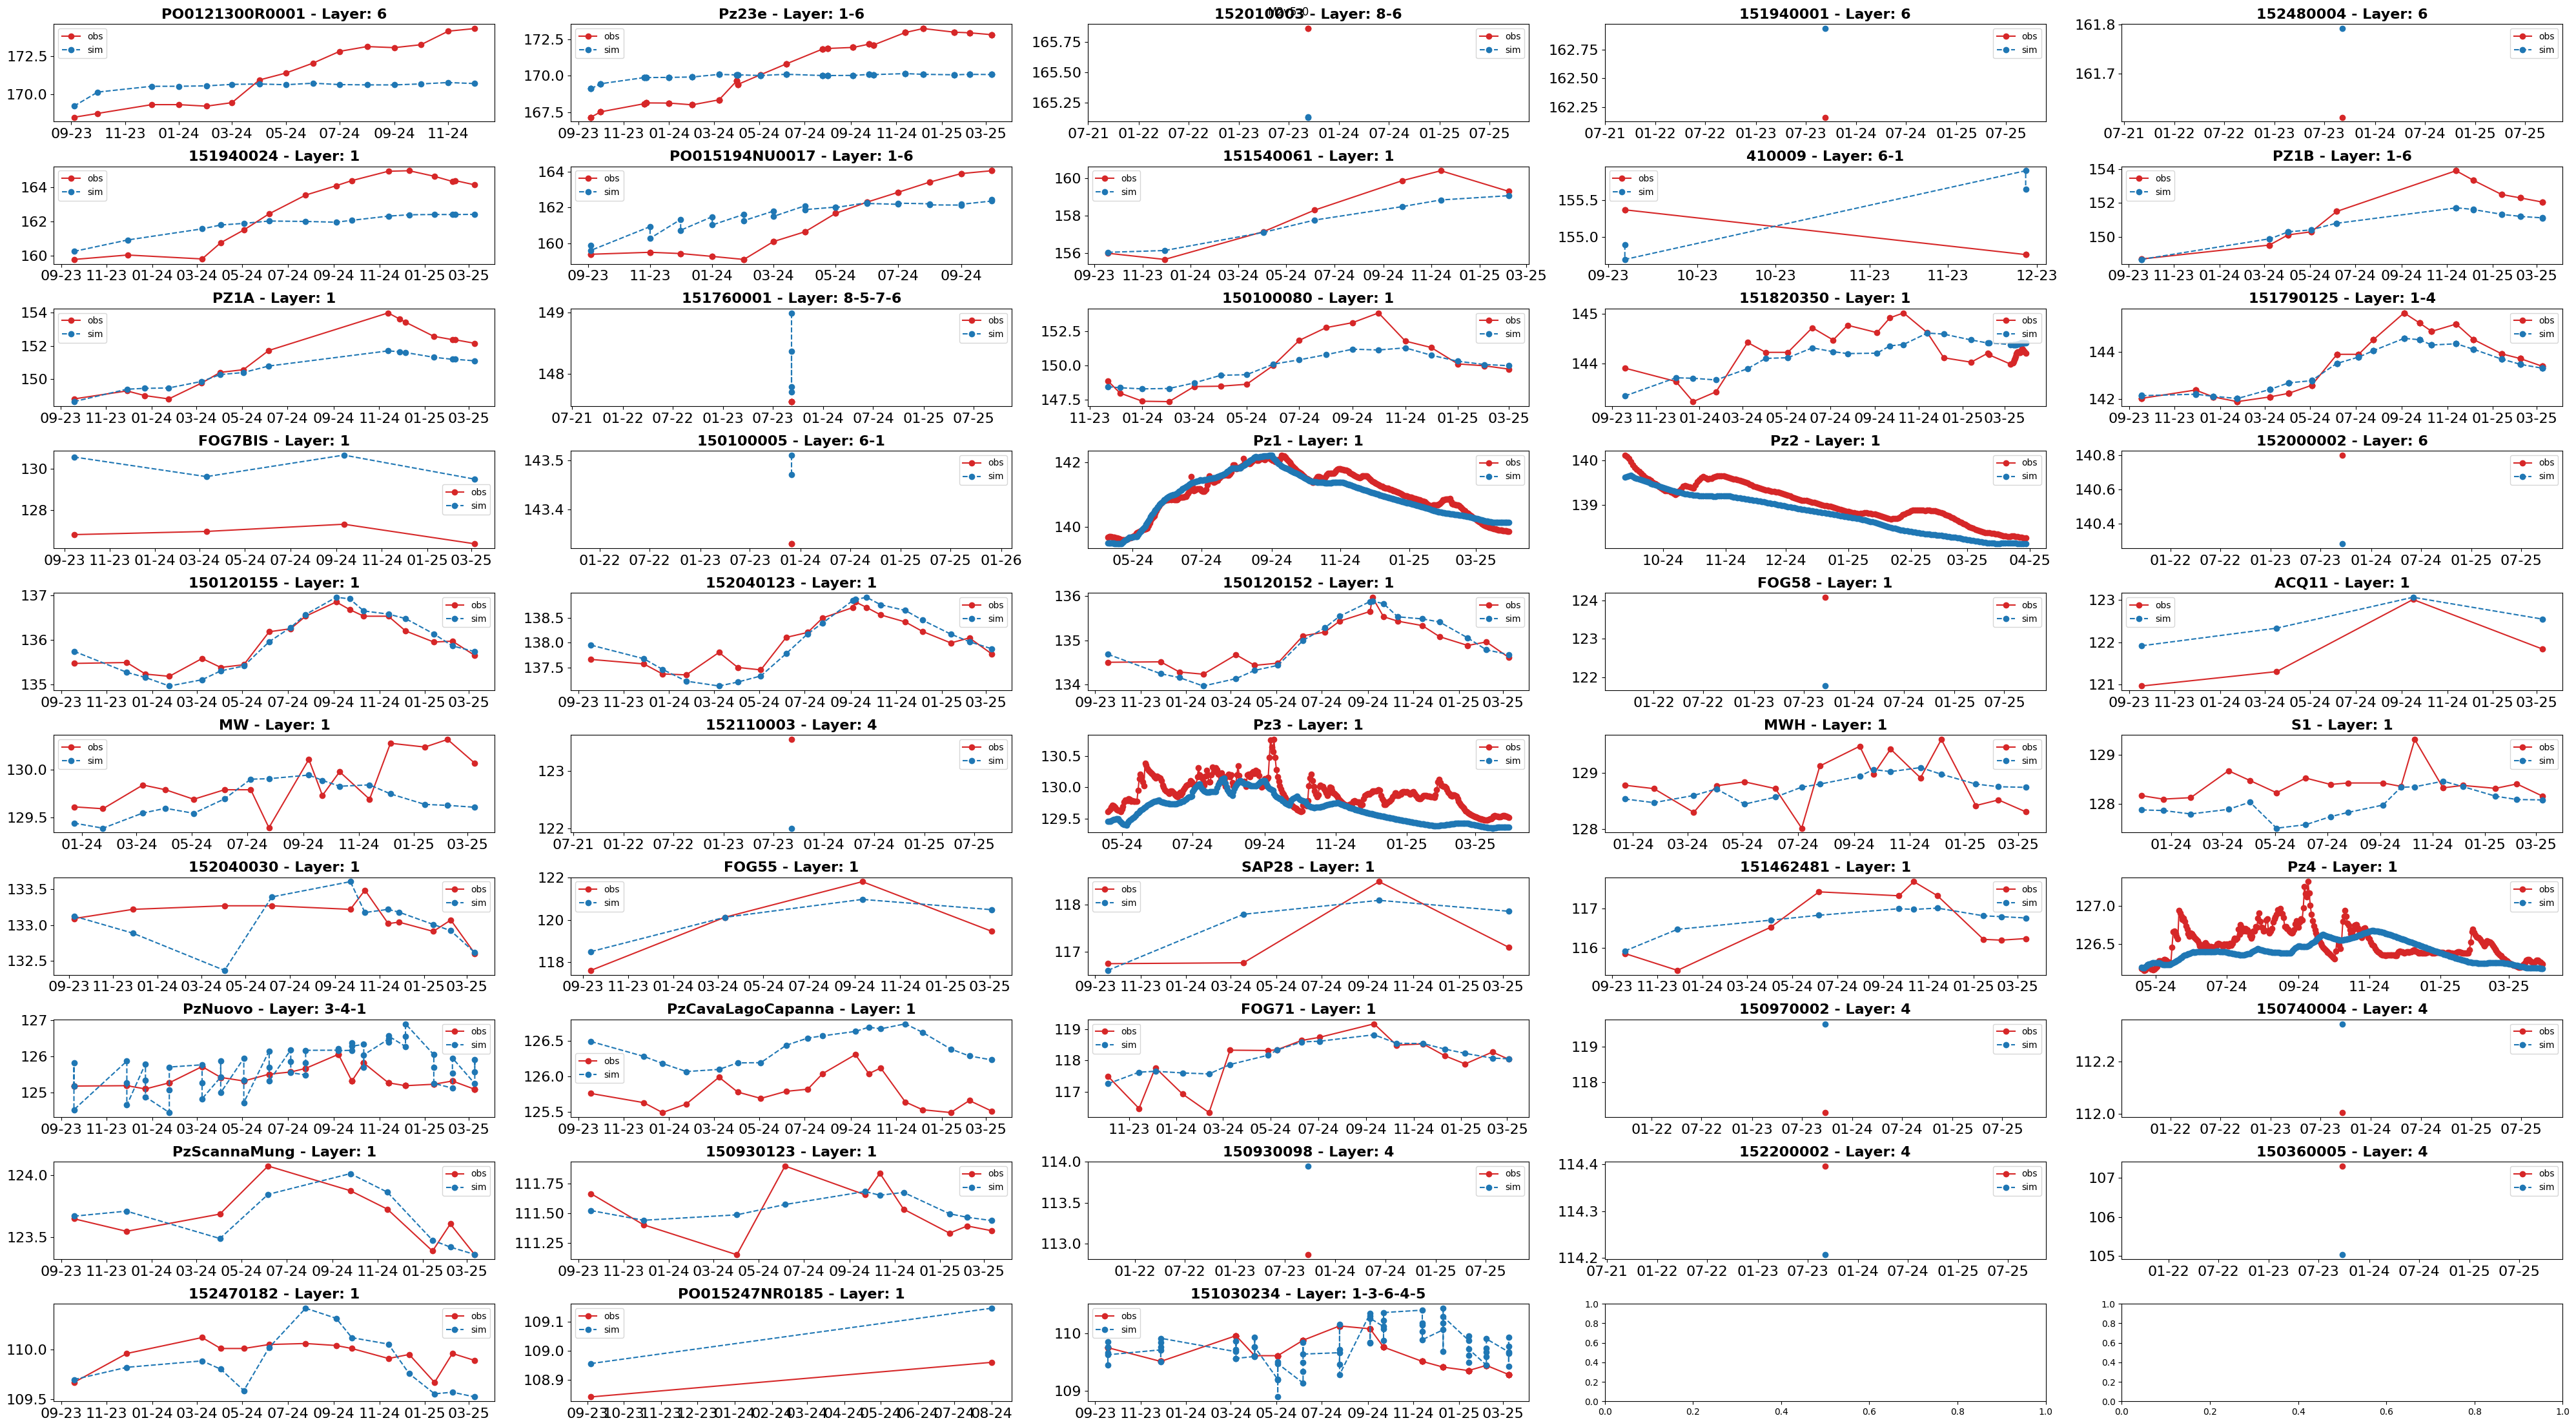

In [308]:
# Visualize subplots
fmt = mdates.DateFormatter('%m-%y')

fig, axes = plt.subplots(10, 5, figsize = dv.cm2inch(33.87*3, 19.05*3))

i = 0
for ax in axes.flatten():
    if i < len(df_plot.Name.unique()):
        tool = df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], :].sort_values('Time').copy()
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Observed'],
                marker = 'o', linestyle = '-', color = 'tab:red', label = 'obs')
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Simulated'],
                marker = 'o', linestyle = '--', color = 'tab:blue', label = 'sim')
        ax.legend()

        title = df_plot.Name.unique()[i] + ' - Layer: '+ '-'.join([f'{x}' for x in df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], 'Layer'].unique()])

        ax.set_title(title, fontweight = 'bold', ha = 'center', fontsize = 16)
        ax.xaxis.set_major_formatter(fmt)
        ax.tick_params(axis='both', which='major', labelsize=16)
        
    i += 1

fig.suptitle(model_name)
fig.tight_layout()

fig.savefig(os.path.join(model_cwd, 'plot', 'target-subplots.png'), bbox_inches = 'tight', dpi = 300)

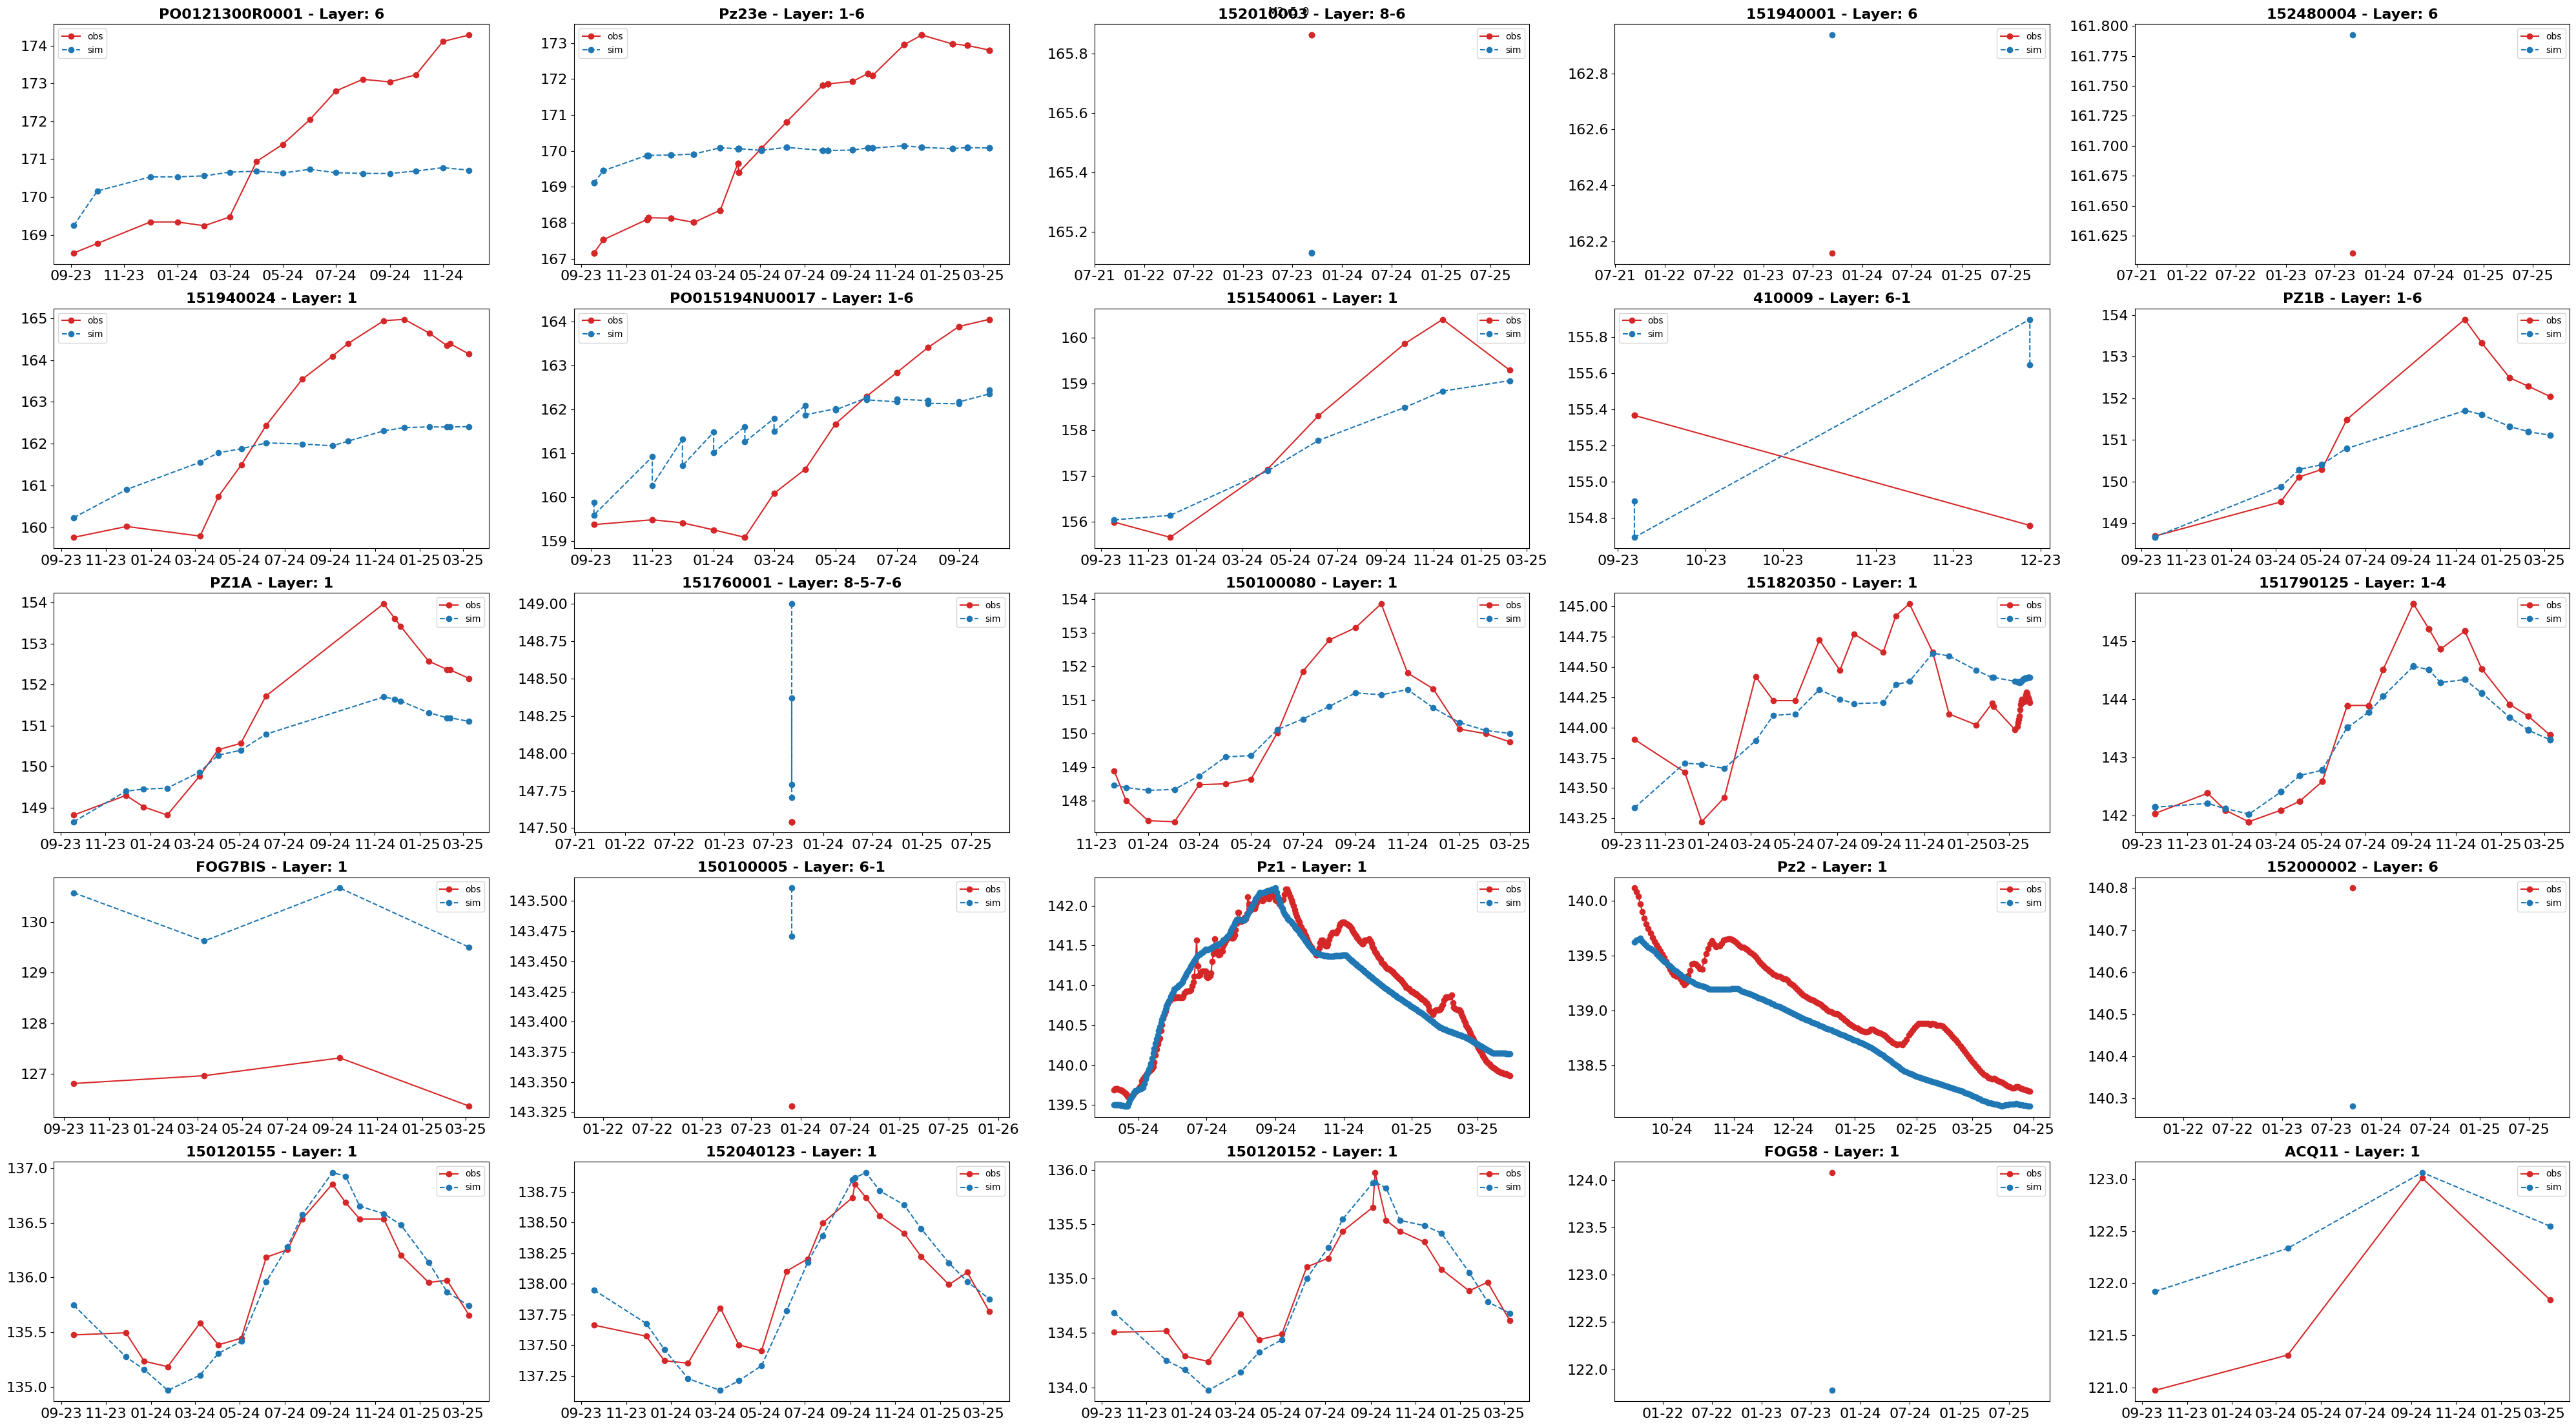

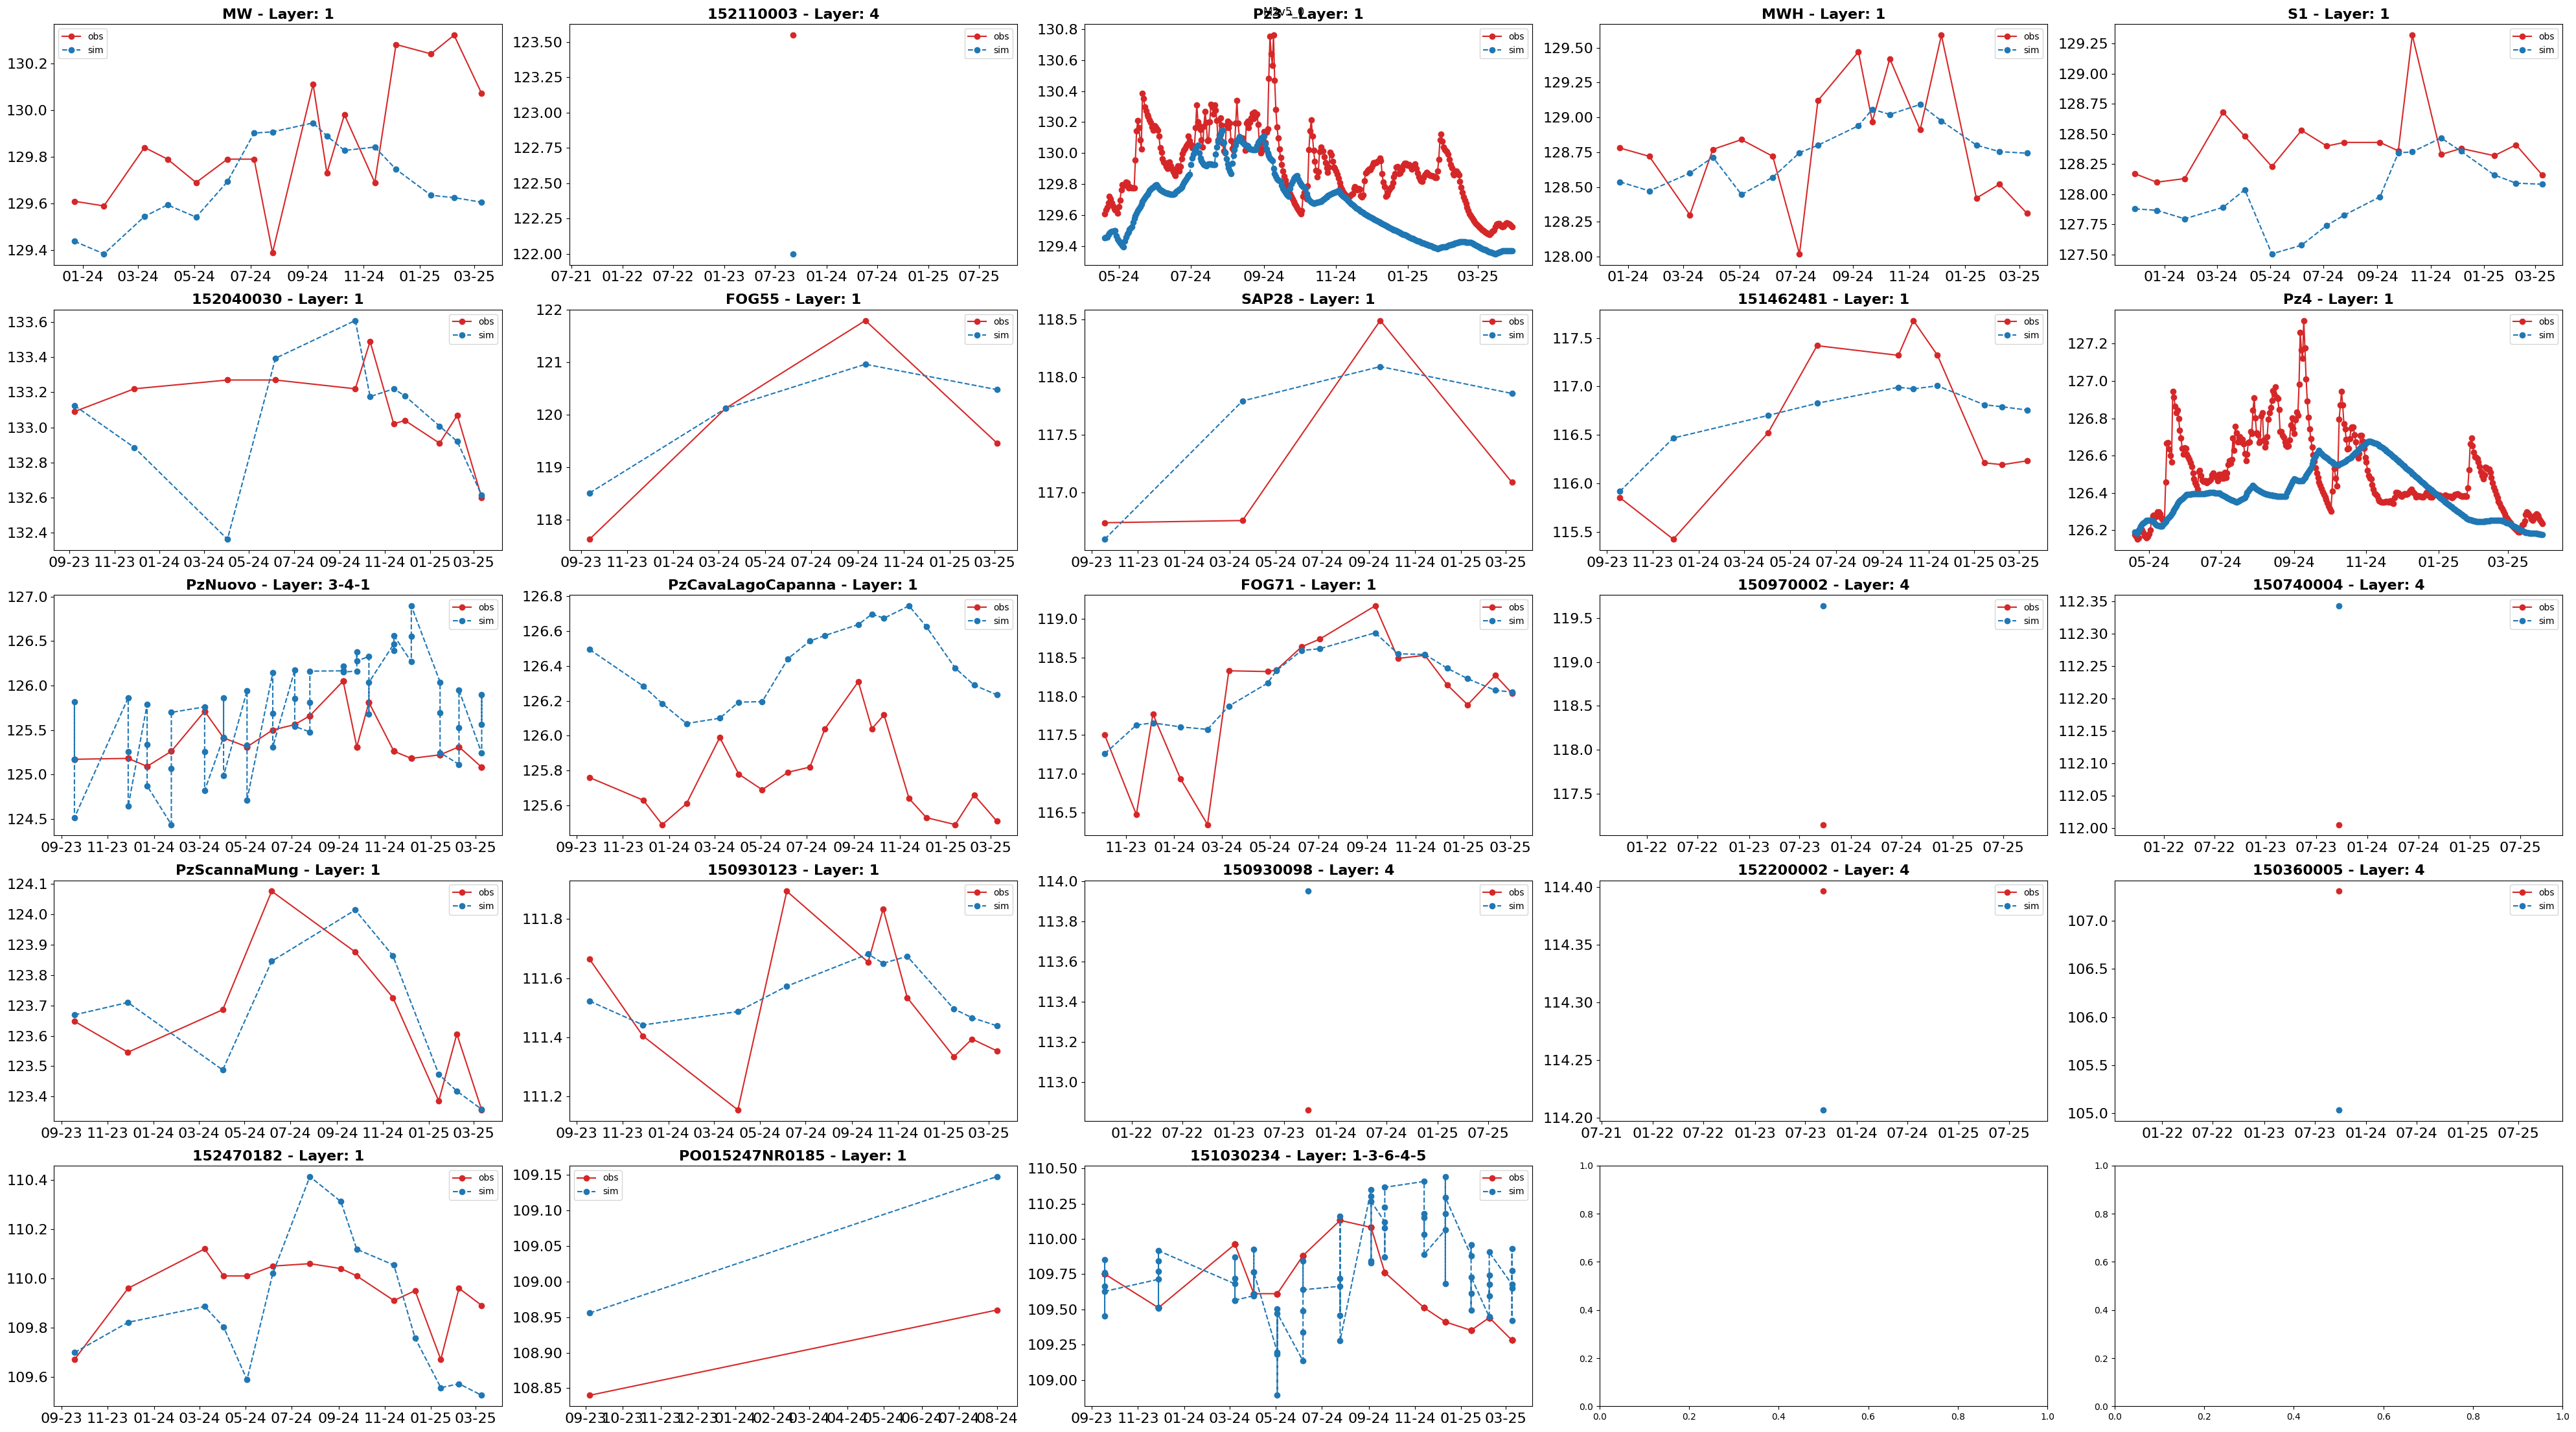

In [309]:
# Visualize subplots, split in 2
fmt = mdates.DateFormatter('%m-%y')

fig, axes = plt.subplots(5, 5, figsize = dv.cm2inch(33.87*3, 19.05*3))

i = 0
for ax in axes.flatten():
    if i < len(df_plot.Name.unique()):
        tool = df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], :].sort_values('Time').copy()
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Observed'],
                marker = 'o', linestyle = '-', color = 'tab:red', label = 'obs')
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Simulated'],
                marker = 'o', linestyle = '--', color = 'tab:blue', label = 'sim')
        ax.legend()

        title = df_plot.Name.unique()[i] + ' - Layer: '+ '-'.join([f'{x}' for x in df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], 'Layer'].unique()])

        ax.set_title(title, fontweight = 'bold', ha = 'center', fontsize = 16)
        ax.xaxis.set_major_formatter(fmt)
        ax.tick_params(axis='both', which='major', labelsize=16)
        i += 1

fig.suptitle(model_name)
fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'target-subplots-part1.png'), bbox_inches = 'tight', dpi = 300)

fig, axes = plt.subplots(5, 5, figsize = dv.cm2inch(33.87*3, 19.05*3))

for ax in axes.flatten():
    if i < len(df_plot.Name.unique()):
        tool = df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], :].sort_values('Time').copy()
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Observed'],
                marker = 'o', linestyle = '-', color = 'tab:red', label = 'obs')
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Simulated'],
                marker = 'o', linestyle = '--', color = 'tab:blue', label = 'sim')
        ax.legend()

        title = df_plot.Name.unique()[i] + ' - Layer: '+ '-'.join([f'{x}' for x in df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], 'Layer'].unique()])

        ax.set_title(title, fontweight = 'bold', ha = 'center', fontsize = 16)
        ax.xaxis.set_major_formatter(fmt)
        ax.tick_params(axis='both', which='major', labelsize=16)  
        i += 1

fig.suptitle(model_name)
fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'target-subplots-part2.png'), bbox_inches = 'tight', dpi = 300)

### Scatterplot obs vs sim

In [310]:
# Read
target_results = pd.read_csv(os.path.join(model_cwd, f'{model_name}_headtarget_resids.csv'))

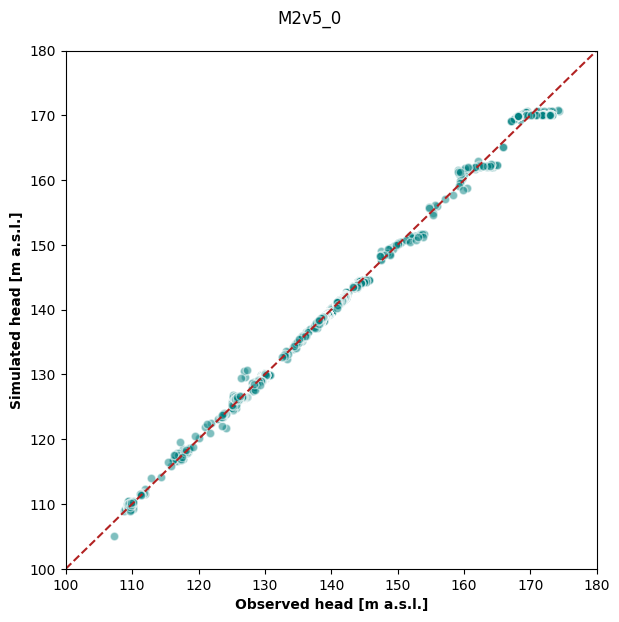

In [311]:
fig, ax = plt.subplots(1,1, figsize = dv.cm2inch(8*2, 8*2))

sns.scatterplot(df_plot, x = 'Observed', y = 'Simulated', marker = '.', ax = ax, alpha = 0.5,
                s = 150, color = 'teal')

ax.axline((0,0), (180,180), color='firebrick', linestyle='--')
ax.set_xlim(100,180)
ax.set_ylim(100,180)

ax.set_xlabel('Observed head [m a.s.l.]', fontweight = 'bold')
ax.set_ylabel('Simulated head [m a.s.l.]', fontweight = 'bold')

fig.suptitle(model_name)
fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'obs-vs-sim.png'), bbox_inches = 'tight', dpi = 300)

### Selected points

In [247]:
# Read
target_results = pd.read_csv(os.path.join(model_cwd, f'{model_name}_headtarget_resids.csv'))

# Obtain field "date"
dates = [date_start + datetime.timedelta(0, t) for t in target_results.Time]
target_results['Date'] = dates

<Axes: xlabel='Date'>

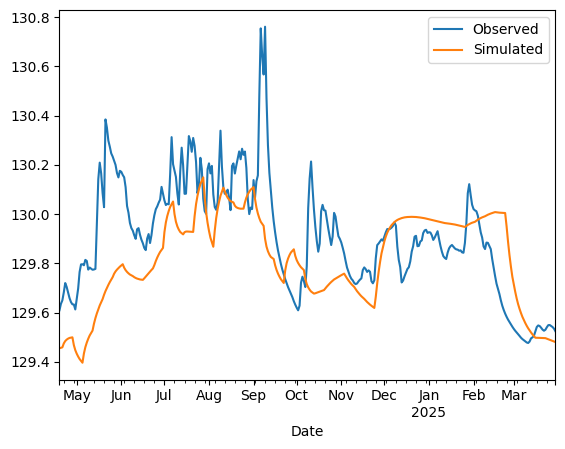

In [51]:
target_results.loc[target_results.Name == 'Pz3', ['Observed', 'Simulated', 'Date']].set_index('Date').plot()

### Weekly dataloggers

In [151]:
# Read
target_results = pd.read_csv(os.path.join(model_cwd, f'{model_name}_headtarget_resids.csv'))

# Obtain field "date"
dates = [date_start + datetime.timedelta(0, t) for t in target_results.Time]
target_results['Date'] = dates

In [152]:
weeks = pd.date_range('2023-09-03', '2025-03-30', freq='W-SUN')
weeks = pd.DataFrame({
    'sp': [f'SP{i}' for i in range(1, len(weeks)+1)],
    'weeks': weeks
})
weeks.drop(weeks.index[-1], inplace=True)

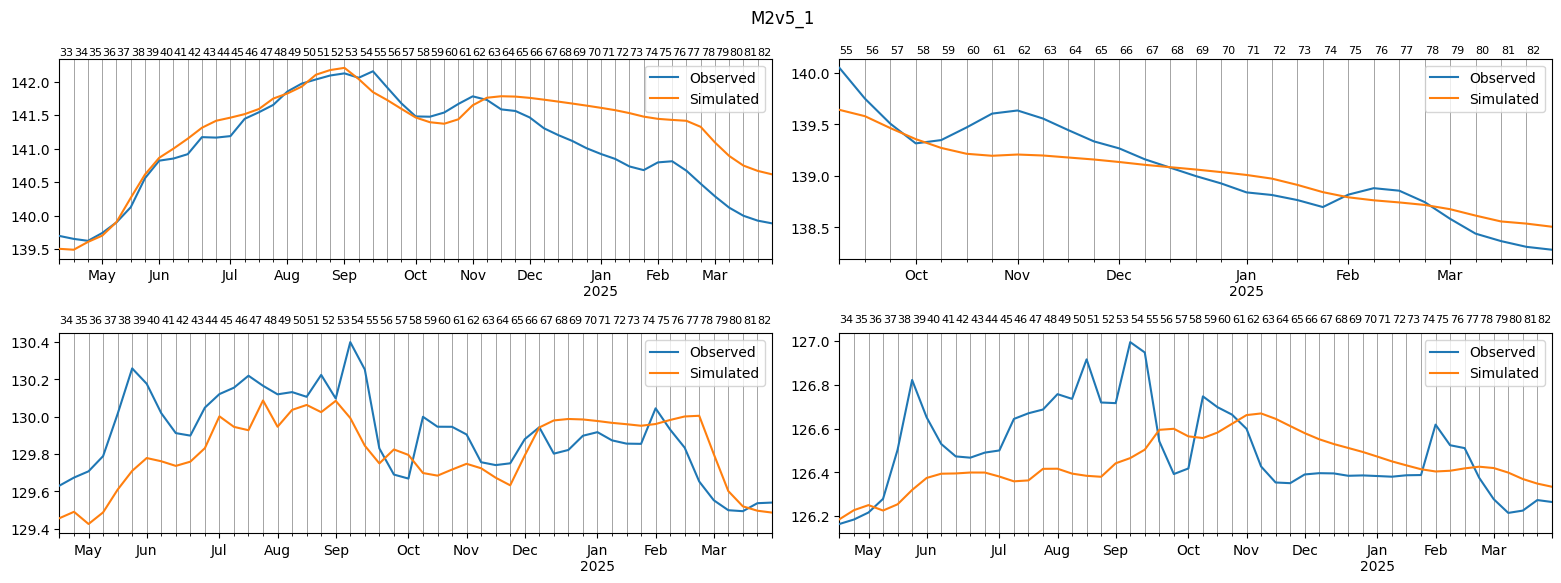

In [153]:
points = ['Pz1', 'Pz2', 'Pz3', 'Pz4']

fig, axes = plt.subplots(2,2, figsize = dv.cm2inch(40, 15))

for p, ax in zip(points, axes.flatten()):
    target_results.loc[target_results.Name == p, ['Observed', 'Simulated', 'Date']].set_index('Date').resample('1W').mean().plot(ax = ax, zorder = 10)
    for _, row in weeks.iterrows():
        if row.weeks > target_results.loc[target_results.Name == p, ['Date']].min().Date:
            ax.axvline(row.weeks, zorder= 1, linewidth = 0.5, color = 'gray')
            ax.text(row.weeks, ax.get_ylim()[1]+0.05, re.sub("[^0-9]", "", row.sp), fontsize = 8)
    ax.set_xlabel('')

fig.suptitle(model_name)
fig.tight_layout()
fig.savefig(os.path.join(model_cwd, 'plot', 'weekly-resampled.png'), bbox_inches = 'tight', dpi = 300)

### Difference in heads with another model

In [302]:
# Setup parameters
# Reference SP
sp_ref = 82 # 78: end of irr, 82: end of simulation, before irrigation season
ts_ref = 5  # reference time step
# Reference layer
layer = 1
# Model 1
model_cwd_1 = model_cwd
model_name_1 = model_name
# Model 2
model_cwd_2 = 'D:/MAURICE/MAURICE Model/MAU_v2/MAU_v2_transient/MAU_v2_5_0'
model_name_2 = 'M2v5_0'

# If ModflowUSG
nodes_ref = pd.read_csv('D:/MAURICE/MAURICE Model/MAU_v2/props_for_postprocessing/nodes_row_column.csv')

In [296]:
def get_hds2d(hds1d, nodes_ref, layer, ts, sp):
    """
    Obtain a 2d hds numpy array with the same dimensions as the MODFLOW grid,
    starting from a flopy.utils.binaryfile.HeadUFile.
    Need to provide a correspondence between nodes, row and column (nodes_ref)
    Works on a single layer, timestep and stress period

    hds1d: flopy.utils.binaryfile.HeadUFile
    nodes_ref: pandas.DataFrame
        columns needed:
            - node
            - row
            - column
    layer: int
        Layer to extract
    ts: int
        Time step to extract
    sp: int
        Stress period to extract
    """
    hds1d = hds1d.get_data(kstpkper = (ts-1, sp-1))[layer-1]
    hds2d = np.zeros(shape = (nodes_ref.row.max(), nodes_ref.column.max()))
    for r in range(hds2d.shape[0]):
        for c in range(hds2d.shape[1]):
            hds2d[r,c] = hds1d[nodes_ref.loc[(nodes_ref.row == r+1) & (nodes_ref.column == c+1)].node.values[0]-1]
    return hds2d

In [303]:
# For MODFLOW-USG
hds1 = fp.utils.binaryfile.HeadUFile(os.path.join(model_cwd_1, f'{model_name_1}.hds'))
hds2 = fp.utils.binaryfile.HeadUFile(os.path.join(model_cwd_2, f'{model_name_2}.hds'))

hds12d = get_hds2d(hds1, nodes_ref, layer, ts_ref, sp_ref) # 18s, could be improved
hds22d = get_hds2d(hds2, nodes_ref, layer, ts_ref, sp_ref) # 18s, could be improved

In [304]:
# Obtain difference
diff = hds12d-hds22d

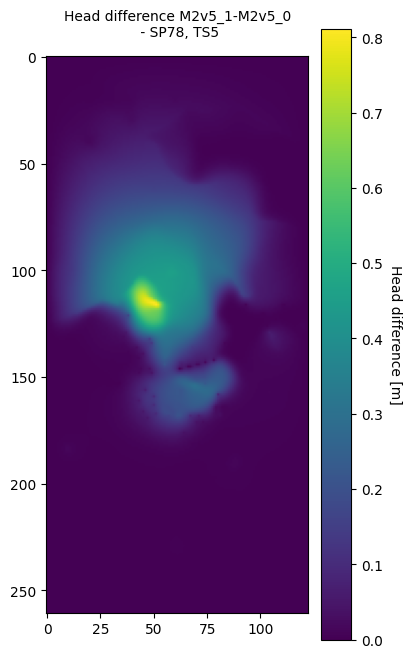

In [299]:
# Plot the differences
fig, ax = plt.subplots(1,1, figsize = dv.cm2inch(5*2,30*2))
# Create colorbar

im = ax.imshow(diff, )

cbar = fig.colorbar(im, fraction=0.1, pad=0.04)
cbar.ax.set_ylabel('Head difference [m]', rotation=-90, va = "bottom")

ax.set_title(f'Head difference {model_name_1}-{model_name_2}\n - SP{sp_ref}, TS{ts_ref}', y = 1.02, fontsize = 10)
fig.savefig(os.path.join(model_cwd_1, 'plot', f'map-diff-{model_name_1}-{model_name_2}-sp{sp_ref}-ts{ts_ref}.png'), bbox_inches = 'tight', dpi = 300)

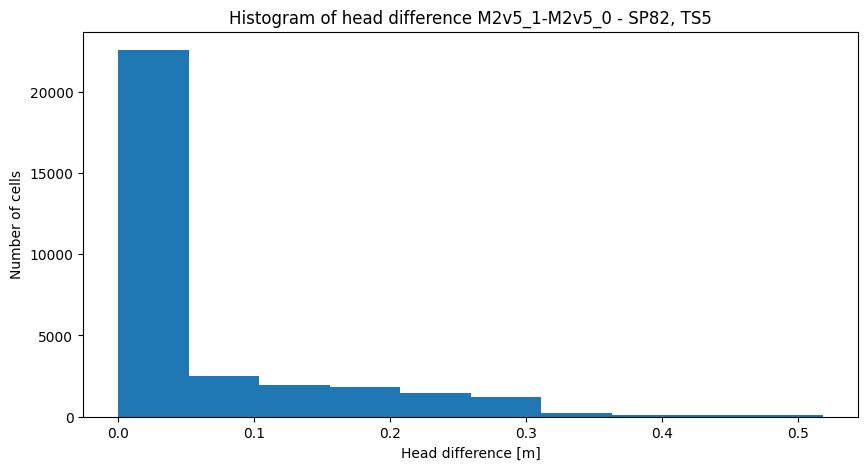

In [305]:
# Plot the 
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.hist(diff.flatten(), bins=10)
ax.set_xlabel('Head difference [m]')
ax.set_ylabel('Number of cells')
ax.set_title(f'Histogram of head difference {model_name_1}-{model_name_2} - SP{sp_ref}, TS{ts_ref}')
fig.savefig(os.path.join(model_cwd_1, 'plot', f'hist-diff-{model_name_1}-{model_name_2}-sp{sp_ref}-ts{ts_ref}.png'), bbox_inches = 'tight', dpi = 300)

In [301]:
# Print and save report
diff = hds12d - hds22d
vol_increase = (diff*0.2*100*100).sum()
print(model_name_1, '-', model_name_2)
print(f'SP{sp_ref}, TS{ts_ref}')
print(f'Volume increase in layer {layer}:', round(vol_increase), 'm3')

with open(os.path.join(model_cwd_1, 'plot', f'vol_diff_{model_name_1}-{model_name_2}_sp{sp_ref}_ts{ts_ref}.txt'), 'w') as f:
    f.write(f'{model_name_1} - {model_name_2}\n')
    f.write(f'SP{sp_ref}, TS{ts_ref}\n')
    f.write(f'Volume increase in layer {layer}: {round(vol_increase)} m3')

M2v5_1 - M2v5_0
SP78, TS5
Volume increase in layer 1: 4268273 m3


## Mass balance

In [43]:
# From .cbb
cbb = fp.utils.CellBudgetFile(os.path.join(model_cwd, f'{model_name}.cbb'))

# If ModflowUSG
nodes_ref = pd.read_csv('D:/MAURICE/MAURICE Model/MAU_v2/props_for_postprocessing/nodes_row_column.csv')

In [65]:
def get_cbb2d(cbb1d, nodes_ref, layer, ts, sp, text):
    """
    ## CAREFUL ##
    This has been tested on a simple grid, without quad-trees or other
    grid changes, so the numbering of nodes is pretty straightforward
    (the numbering was assigned by GWV9)

    Obtain a 2d hds numpy array with the same dimensions as the MODFLOW grid,
    starting from a flopy.utils.binaryfile.HeadUFile.
    Need to provide a correspondence between nodes, row and column (nodes_ref)
    Works on a single layer, timestep and stress period

    hds1d: flopy.utils.binaryfile.HeadUFile
    nodes_ref: pandas.DataFrame
        columns needed:
            - node
            - row
            - column
    layer: int
        Layer to extract
    ts: int
        Time step to extract
    sp: int
        Stress period to extract
    """
    cbb1d = cbb1d.get_data(kstpkper = (ts-1, sp-1), text = text)[0]
    cbb1d = cbb1d[0,0,nodes_ref.row.max()*nodes_ref.column.max()*(layer-1):nodes_ref.row.max()*nodes_ref.column.max()*layer]
    cbb2d = np.zeros(shape = (nodes_ref.row.max(), nodes_ref.column.max()))
    for r in range(cbb2d.shape[0]):
        for c in range(cbb2d.shape[1]):
            cbb2d[r,c] = cbb1d[nodes_ref.loc[(nodes_ref.row == r+1) & (nodes_ref.column == c+1)].node.values[0]-1]
    return cbb2d

In [66]:
cbb2d = get_cbb2d(cbb, nodes_ref, 1, 5, 78, text='DRAINS')

In [ ]:
# Litta
# 18894
# 154
# 75

In [69]:
cbb2d[153,74]

np.float64(-0.018780795857310295)

### From GWV Boundary Reach Report


In [ ]:
# Load the Boundary Reach Report (obtained through)
brr = pd.read_csv(os.path.join(model_cwd, 'post', 'brr.csv'), skiprows=2)

# Obtain field "date"
dates = [date_start + datetime.timedelta(0, t) for t in brr.Time]
brr['Date'] = dates

In [ ]:
# Extract reach
tool = brr.loc[(brr['Reach or Zone'] > 500) & (brr['Reach or Zone'] < 670), :]

In [103]:
font_dict = {
    'Borghese': 533,
    'Branzino': 631,
    'Busca': 608,
    'Cicogna': 565,
    'Ghiglio': 566,
    'Litta': 618,
    'Nuovo': 627,
    'Pobbia': 624,
    'Torchiana': 641,
    'Tedesco': 603
}

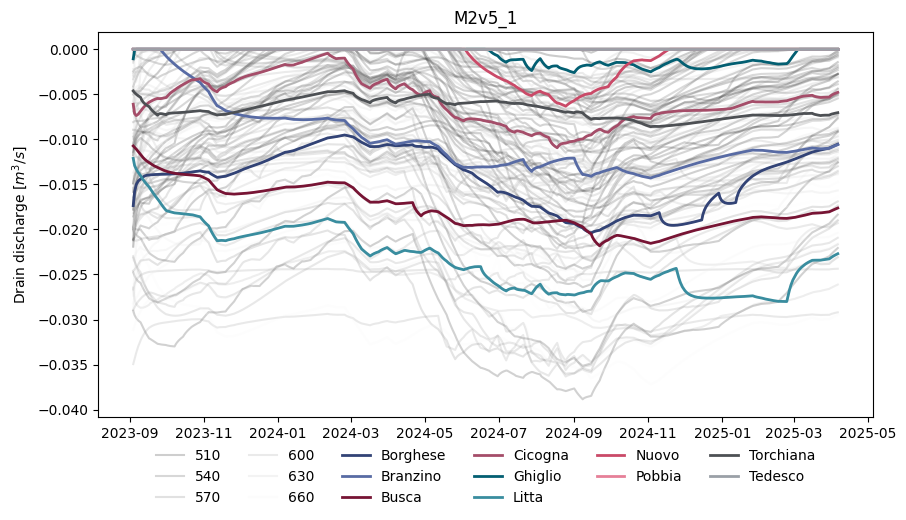

In [150]:
cmap = load_cmap("pal_unikn_dark")

fig, ax = plt.subplots(1,1, figsize = (10,5))

sns.lineplot(tool, x = 'Date', y = 'Drain', hue = 'Reach or Zone', palette = 'gray', alpha = 0.2)

ax.set_xlabel('')
ax.set_ylabel('Drain discharge [$m^3/s$]')

for font, c in zip(font_dict.keys(), cmap.hex):
    ax.plot(tool.loc[tool['Reach or Zone'] == font_dict[font], ['Date', 'Drain']].set_index('Date'), color = c, label = font, linewidth = 2)

ax.set_title(model_name)
ax.legend(bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol = 6, fancybox = False, frameon = False)

fig.savefig(os.path.join(model_cwd, 'plot', f'cbb-{model_name}-drains-lowland-springs.png'), bbox_inches = 'tight', dpi = 300)

## Video of changing head differences

In [ ]:
# Generate 3d ndarray of differences for each SP and TS

# loop over SP and TS
# save the diffs into a 3d array
# save the 3d array